<a href="https://colab.research.google.com/github/Jhonathan-Ferroni/PythonforML/blob/main/Rede_Neural_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import torch
import torch.nn.functional as nf
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [29]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


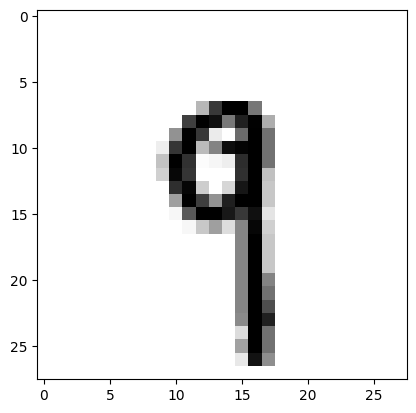

In [30]:
dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [31]:
print(imagens[0].shape)# para verificar as dimensoes do tensor de cada imagem
print(etiquetas[0].shape)# para verificar as dimensoes do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [32]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128) # camada de ntrada 784 neuronios ligados a 128 neuronios
    self.linear2 = nn.Linear(128, 64)  # camada interna 1 - 128 ligados a 64
    self.linear3 = nn.Linear(64, 10) # camada interna 2 - 64 ligados a 10

  def __forward(self, X):
    x = F.relu(self.linear1(X)) #funcao de ativacao da camada de entrada para camada interna 1
    x = F.relu(self.linear2(X)) #funcao de ativacao da camada interna 1 para camada interna 2
    x = self.linear3(X)  #funcao de ativacao da camada interna 2 para camada de saida nesse caso f(x) = x
    return F.log_softmax(x, dim=1)

In [33]:
def treino(modelo,trainLoader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
  inicio = time()

  criterio = nn.NLLLoss()
  EPOCHS = 10
  modelo.train()

  for epoch in range(EPOCHS):
    perda_acumulada = 0.0

    for imagens, etiquetas in trainLoader:

      imagens = imagens.view(imagens.shape[0], -1)
      otimizador.zero_grad()

      output = modelo(imagens.to(device))
      perda_instantanea = criterio(output, etiquetas.to(device))

      perda_instantanea.backward()
      otimizador.step()

      perda_acumulada += perda_instantanea.item()

    else:
      print("Epoch {} - Perda resultante: {}".format(epoch+1, perda_acumulada/len(trainLoader)))
  print("\nTempo de treino (em minutos) = ", (time()-inicio)/60)

In [34]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_todas = 0, 0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)
      # desativa a diferenciacao para acelerar a validacao da rede
      with torch.no_grad():
        logps = modelo(img.to(device)) # para calcular a saida da rede

        ps = torch.exp(logps)
        probab = list(ps.cpu().numpy()[0])
        etiqueta_pred = probab.index(max(probab))
        etiqueta_certa = etiquetas.numpy()[i]
        if(etiqueta_certa == etiqueta_pred):
          conta_corretas += 1
        conta_todas += 1

  print("Total de imagens testadas =", conta_todas)
  print("\nPrecisão da rede no conjunto de treinamento = {}%".format(conta_corretas*100/conta_todas))

In [35]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)